# ARCDAP-3 ESMValTool Worksheet 

---
## Module 1 (Solutions)

---

In [ ]:
# created by Gerald on 17 Jan 2020

# copy & paste the ESM_Worksheets folder into the ~/ESMValtool/ directory and open it there.

Welcome to Module 1 of the ESMValTool Worksheet designed for the hands-on sessions during the ARCDAP-3 workshop. Module 1 will cover the aims and instructions for this worksheet as well the Tasks 0 and 1 of the hands-on sessions. Please complete the worksheet modules in order from 1 to 3. 

Enter your details in the cell below:

In [ ]:
# Name: 
# Organisation: 
# GCMs used: 

In [2]:
#imports 

import numpy as np
import scipy as sp
import xarray as xr

from IPython.display import Image, display

import fnmatch # find match

import glob
from pprint import pprint
from pathlib import Path

### Aims

This worksheet is designed as a starting point for ARCDAP-3 participants to use ESMValTool and Python (through Jupyter Notebook) to perform routine model evaluation diagnostics on global climate models (GCMs) from the CMIP database. Some familiarity with the Python and Unix language, along with netCDF files is required to perform the exercises in this worksheet. By the end of ARCDAP-3, you should have successfully evaluated for your assigned GCM(s): <br>
* Plots of (and) mean 850 hPa air temperature and precipitation flux from 2000 - 2002. **(Module 1)** 
* Plots of (and) mean surface temperature and precipitation flux biases from 1995 - 2014. **(Module 2)** 
* Plots of trends in sea-surface temperatures, ENSO and IOD indices from 1979-2014. **(Module 3)**  
* Short write-ups on your results and observations  

### Instructions

You may complete this worksheet individually or as a pair; CMIP GCMs have been assigned to participating countries in pairs. Follow the instructions to write your own code or make edits to the code cells wherever prompted by the comments (denoted by #). 

For the GCMs that you’ll work on, refer to the model assignment and download (or copy from one of the available hard drives) the model data assigned to you e.g. if you’ve been assigned the CNRM-CM6-1 model, download all 4 variable files (tas, ts, pr, psl) from this model. **Check that you have downloaded the correct files before proceeding.** Note the slightly different file name conventions between CMIP generations: <br>

CMIP5: 
* ```[variable_short_name]_[mip]_[dataset_name]_[experiment]_[ensemble]_[start-date]-[end-date].nc```

CMIP6:
* ```[variable_short_name]_[mip]_[dataset_name]_[experiment]_[ensemble]_[grid]_[start-date]-[end-date].nc```

Also download the *ERA-Interim* folder containing ERA-Interim data for the same 4 variables and *HadISST* folder containing the *HadISST_sst.nc* file. You should have thus downloaded a total of **13 data files**. 

### Some Orientation
You'll be using the Jupyter Notebook cells to run ESMValTool and other Unix commands as if you are using a terminal. If you have followed the instructions correctly, you should have opened this Notebook in the *~/ESMValTool* directory (*~* is just shortcut for your home directory which will be */home/arcdap* if you're using the VM) with the esmvaltool environment activated. This notebook should be running on a Python 3 kernel, meaning that scripts you write into the code cells are interpreted as Python. 

In [3]:
A = 1
A < 2

True

However you can also use the Jupyter cells to call Unix commands as though you are in a terminal by simply adding ```!``` at the front of your code.  

In [4]:
!ls #ls command lists all the files in your current directory, ~/ESMValTool 

CITATION.cff		 esmvaltool			       NOTICE
CODE_OF_CONDUCT.md	 esmvaltool_output		       README.md
config-user-example.yml  ESMValTool Worksheet_cvdp_Chen.ipynb  RELEASE_NOTES
CONTRIBUTING.md		 ESMValTool Worksheet_Q1.ipynb	       setup.cfg
doc			 language_support.sh		       setup.py
docker			 LICENSE			       tests
environment.yml		 meta.yaml


## Task 0: Prerequisites 
---

**Data and Scripts needed:** <br>
Model and Observation output: <br>
- 2 x CMIP6 Models + 1 x ERA-Interim <br>
- CMIP experiment: historical <br>
- Variables: tas, ts, pr, psl  <br>
- Frequency: Monthly mean <br>

Raw Observation output: <br>
- 1 x HadISST <br>
- Variables: ts/SST <br>
- Frequency: Monthly mean <br>
    
---

Before running ESMValTool, you have to first organise your downloaded CMIP6 and ERA-Interim files and properly set up the configuration file that ESMValTool reads to know where to find your data. For standardisation, please follow the steps below to ensure that everyone will have the same set-up of how and where their data are stored to make any debugging later easier. 

#### Organising your data

1. Open up your home folder by clicking on MENU and selecting "File Manager"(for users using the VM). In your */home/arcdap* folder you should see that a folder *Models* has already been created for you. Inside this folder, you should find “ta” and “pr” netCDF (.nc) files belonging to the MPI-ESM-LR from CMIP5 that have been pre-downloaded. **Move or Copy** only the CMIP6 .nc files that you downloaded to this *Models* folder. You will use this folder to store all the CMIP6 .nc files you have downloaded (without any further subfolders). 

<img src='Images/models_folder.jpg' width="400">

<h5 align="center">All CMIP output .nc files in the same ~/Models directory.<h5>

2. For the ERA-Interim observation "OBS6" files, first create a directory in */home/arcdap* called *Obs*. Inside *Obs*, create a sub-folder called *Tier3* then copy/move the *ERA-Interim* folder that you downloaded into this *Tier3* folder. (*This tier corresponds to  data tiers where Tier3 refers to restricted datasets i.e. requires a registration to be retrieved or provided upon request to the respective contact or PI*). Your ERA-Interim .nc data files should now be inside the */home/arcdap/Obs/Tier3/ERA-Interim* directory. 

3. For the HadISST raw observation file *HadISST_sst.nc*, first create a directory in */home/arcdap* called *RawObs*. Inside *RawObs*, create a sub-folder called *Tier2* and then copy/move the *HadISST* folder that you downloaded into this *Tier2* folder. Your *HadISST_sst.nc* file should now be inside the */home/arcdap/RawObs/Tier2/HadISST* directory. 

#### Setting up the ESMValTool configuration file. 

You will now set up the configuration file in ESMValTool to direct it to find CMIP and Observation files in the *~/Models*, *~/Obs* and *~/RawObs* directories. 
1. Open up the *config-user-example.yml* file with the cell below.

In [8]:
# geany is the name of the text editor that you're commanding to open to edit the config file
!geany ~/ESMValTool/config-user-example.yml

^C


2. In the *config-user-example.yml* file, set the paths for the ```CMIP5``` and ```CMIP6``` directories under ```rootpath``` to the directory ```~/Models```. Create a new line called ```OBS6``` and set the path for ```OBS6``` and ```OBS``` to ```~/Obs```. Lastly, set the path for ```RAWOBS``` to ```~/RawObs```. Your configuration file should resemble the image below. 

<img src='Images/config.PNG'>

3. Scroll to the bottom and ensure that the options ```write_plots``` and ```write_netcdf``` are both set to ```true```. Leave all other settings as their defaults. Save and close your *config-user-example.yml* file.

Well done! You're now all set to start the worksheet proper. 

## Task 1: Getting Started

--- 
**Data and Scripts needed:** <br>
Model output: <br>
- 1x CMIP5 Model output (MPI-ESM-LR) <br>
- CMIP experiment: historical <br>
- Variables: ta, pr <br>
- Frequency: Monthly mean <br>

Recipe: *~/ESMValTool/esmvaltool/recipes/examples/recipe_python.yml*

---

### T1.1. Create plots of mean air temperature and precipitation flux from 2000 to 2002 for one of your assigned GCMs

This starting task will help you get used to the workflow and design of ESMValTool. You will use a simple example recipe to plot the model’s mean 850 hPA air temperature (ta) and precipitation flux (pr) over a short time period. 

Using the code cell below, navigate to the esmvaltool/recipes/examples/ directory and open the recipe_python.yml file. 

In [11]:
!geany esmvaltool/recipes/examples/recipe_python.yml

The first section of the recipe documents metadata of the recipe such as the recipe’s description and authors. The second section includes the declaration of datasets to be evaluated with this recipe. You should see something like this: 

<img src='Images/recipe_python.PNG'>

You should understand the first line under ```datasets``` (enclosed in { }) as referring to the CanESM2 model, from the CMIP5 project. The frequency of data to be used is monthly (“Amon” refers to Atmospheric Monthly), the data from the CMIP “historical” experiment and from the “r1i1p1” ensemble member. ESMValTool identifies the model output to be processed based on how these are declared and whether they match with the names of each model's respective .nc files. 


The recipe will then be performed over data from the year 2000 to 2002. 

You'll need to edit the ```datasets``` section so that the recipe only runs for the models that you want to run the recipe on. You only have output from the CMIP5 MPI-ESM-LR model, hence keep the line which belongs to this model and remove/comment out the unwanted models e.g. CanESM2. <br>

---
*You can also comment out lines in yml using “#” at the start, similar to Python. Yml however not does support multi-line commenting.*

---

Moving down, the preprocessors section indicates that before the actual recipe is run, the GCM air temperature data is first extracted from the 85000 Pa level and that a linear re-gridding scheme is used. Lastly, the diagnostics section provides a short description of what the actual diagnostic code, *examples/diagnostic.py* does, as well as the variables required, “ta” and “pr”. 

You are now ready to run your first ESMValTool recipe! 

1. Running recipes in ESMValTool typically follow a structure of:

               esmvaltool -c [Configuration File] [Recipe File]

2. Run the recipe in the cell below: 

If your recipe runs successfully, you will see a ```Run was successful``` message at the end of the output. _Please feel free to consult any of the experts should you encounter an error or bug. Only proceed if your recipe runs successfully._

In [12]:
! esmvaltool -c config-user-example.yml esmvaltool/recipes/examples/recipe_python.yml

2020-01-17 07:01:00,836 UTC [24185] INFO    
______________________________________________________________________
          _____ ____  __  ____     __    _ _____           _
         | ____/ ___||  \/  \ \   / /_ _| |_   _|__   ___ | |
         |  _| \___ \| |\/| |\ \ / / _` | | | |/ _ \ / _ \| |
         | |___ ___) | |  | | \ V / (_| | | | | (_) | (_) | |
         |_____|____/|_|  |_|  \_/ \__,_|_| |_|\___/ \___/|_|
______________________________________________________________________

ESMValTool - Earth System Model Evaluation Tool.

http://www.esmvaltool.org

CORE DEVELOPMENT TEAM AND CONTACTS:
  Veronika Eyring (PI; DLR, Germany - veronika.eyring@dlr.de)
  Bouwe Andela (NLESC, Netherlands - b.andela@esciencecenter.nl)
  Bjoern Broetz (DLR, Germany - bjoern.broetz@dlr.de)
  Lee de Mora (PML, UK - ledm@pml.ac.uk)
  Niels Drost (NLESC, Netherlands - n.drost@esciencecenter.nl)
  Nikolay Koldunov (AWI, Germany - nikolay.koldunov@awi.de)
  Axel Lauer (DLR, Germany - axel.lauer@dlr.d

3. Now, navigate to the directory containing the output from running this recipe. By default, all recipe output files are stored inside the *~/ESMValTool/esmvaltool_output* directory.

In [13]:
! ls esmvaltool_output/

recipe_cvdp_20191213_172749
recipe_cvdp_20191213_173441
recipe_cvdp_20191214_122333
recipe_cvdp_20200116_075447
recipe_python_20200117_070100
recipe_validation_CMIP6_20191213_221918
recipe_validation_CMIP6_20191214_020427
recipe_validation_CMIP6_20191214_022739
recipe_validation_CMIP6_20191214_023144
recipe_validation_CMIP6_20191215_230454
recipe_validation_CMIP6_20191215_230902
recipe_validation_CMIP6_20191216_044746_INDOPAC
recipe_validation_CMIP6_20191216_071113
recipe_validation_CMIP6_20191216_071431
recipe_validation_CMIP6_20191216_073610
recipe_validation_CMIP6_20191216_074228
recipe_validation_CMIP6_20191216_090333
recipe_validation_CMIP6_20191216_092147
recipe_validation_CMIP6_20191216_095212
recipe_validation_CMIP6_20191216_101648
recipe_validation_CMIP6_20191216_102142
recipe_validation_CMIP6_20200116_031130
recipe_validation_CMIP6_20200116_031207
recipe_validation_CMIP6_20200116_031243


4. The output for your recipe will be stored in a sub-directory structured as *[recipe name] _ [YYYYMMDD] _ [HHMMSS]*. The plots of mean “ta” and “pr” should be in the */plots* folder within this directory. Use the code below to open and display the plots. 

In [4]:
home = str(Path.home())  #Your home directory

# Insert the sub-folder containing the recipe output into the ''
# e.g. dirname1='recipe_python_20200117_070100'
dirname1='recipe_python_20200117_070100';  
# Full path of the folder containing the plots produced by the recipe 
dirname=home+'/ESMValTool/esmvaltool_output/'+ dirname1 +'/plots/diagnostic1/script1/';

# List of .png image files in the dirname directory
listing = glob.glob(dirname+'*.png')

pprint(listing)

['/home/arcdap/ESMValTool/esmvaltool_output/recipe_python_20200117_070100/plots/diagnostic1/script1/CMIP5_MPI-ESM-LR_Amon_historical_r1i1p1_ta_2000-2002_mean.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_python_20200117_070100/plots/diagnostic1/script1/CMIP5_MPI-ESM-LR_Amon_historical_r1i1p1_pr_2000-2002_mean.png']


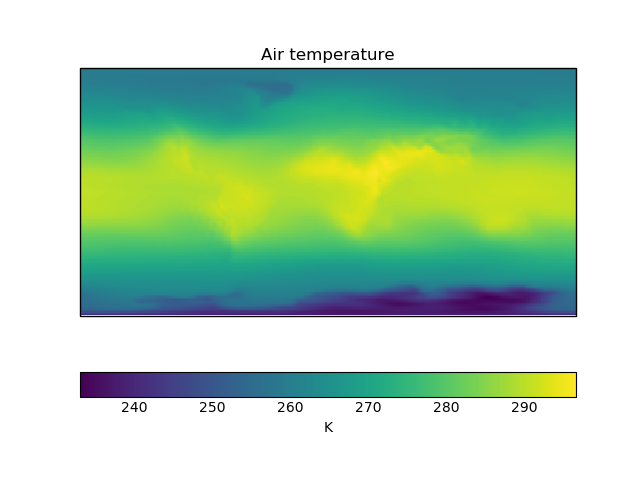

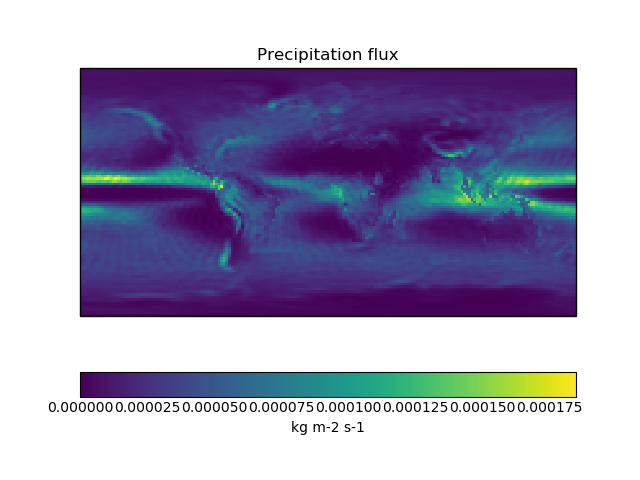

In [6]:
# Display the plots of mean ta and pr:

for imageName in listing:
    display(Image(filename=imageName))
    

### T1.2. Calculate the mean air temperature and precipitation flux from 2000 to 2002 for your assigned GCM

Congratulations! You’ve successfully run and obtained output from your first ESMValTool recipe. However, suppose you want to calculate the global mean air temperature and precipitation flux from these plots, how can you do so? 

1. Because you've set the option for ```write_netcdf``` to ```true``` in the *config-user-example.yml* file in the prerequesites task, ESMValTool has saved the data that generates the above two plots in the .nc format. These will be located in this recipe's output directory in the */work* sub-folder.

In [10]:
dirname2=home+'/ESMValTool/esmvaltool_output/'+ dirname1 +'/work/diagnostic1/script1/';

# List of .png image files in the dirname directory
# Following the example from above for plots, how will you extract the list 
# of .nc files in the directory? Insert your answer in the quotations ''. 
listing2 = glob.glob(dirname2+'*.nc')

pprint(listing2)

['/home/arcdap/ESMValTool/esmvaltool_output/recipe_python_20200117_070100/work/diagnostic1/script1/CMIP5_MPI-ESM-LR_Amon_historical_r1i1p1_pr_2000-2002_mean.nc',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_python_20200117_070100/work/diagnostic1/script1/CMIP5_MPI-ESM-LR_Amon_historical_r1i1p1_ta_2000-2002_mean.nc']


2. Use the xarray library to open the first .nc file for mean precipitation flux (pr) from 2000 to 2002. 

In [11]:
# The pr file is index [0] in the list listing2 
# Insert the 
MPI_1 = xr.open_dataset(listing2[0])
MPI_1

<xarray.Dataset>
Dimensions:            (bnds: 2, lat: 96, lon: 192)
Coordinates:
  * lat                (lat) float64 -88.57 -86.72 -84.86 ... 84.86 86.72 88.57
  * lon                (lon) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    day_of_month       int64 ...
    day_of_year        int64 ...
    month_number       int64 ...
    time               datetime64[ns] ...
    year               int64 ...
Dimensions without coordinates: bnds
Data variables:
    pr                 (lat, lon) float32 ...
    lat_bnds           (lat, bnds) float64 ...
    lon_bnds           (lon, bnds) float64 ...
    day_of_month_bnds  (bnds) int64 ...
    day_of_year_bnds   (bnds) int64 ...
    month_number_bnds  (bnds) int64 ...
    time_bnds          (bnds) datetime64[ns] ...
    year_bnds          (bnds) int64 ...
Attributes:
    associated_files:       baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLoc...
    branch_time:            10957.0
    cmor_version:           2.5.9
    comment:                at surface; includes both liquid and solid phases...
    contact:                cmip5-mpi-esm@dkrz.de
    experiment:             historical
    experiment_id:          historical
    forcing:                GHG Oz SD Sl Vl LU
    frequency:              mon
    initialization_method:  1
    institute_id:           MPI-M
    institution:            Max Planck Institute for Meteorology
    model_id:               MPI-ESM-LR
    modeling_realm:         atmos
    parent_experiment:      pre-industrial control
    parent_experiment_id:   piControl
    parent_experiment_rip:  r1i1p1
    physics_version:        1
    product:                output
    project_id:             CMIP5
    realization:            1
    references:             ECHAM6: n/a; JSBACH: Raddatz et al., 2007. Will t...
    source:                 MPI-ESM-LR 2011; URL: http://svn.zmaw.de/svn/cosm...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  MPI-ESM-LR model output prepared for CMIP5 histor...
    Conventions:            CF-1.5
    provenance:             <?xml version='1.0' encoding='ASCII'?>\n<prov:doc...
    software:               Created with ESMValTool v2.0.0b3
    caption:                Average Precipitation between 2000 and 2002 accor...

3. Extract the mean pr data from the ```'pr'``` key from ```"Data variables"```.

In [12]:
MPI_pr = MPI_1['pr']
MPI_pr

<xarray.DataArray 'pr' (lat: 96, lon: 192)>
array([[2.005672e-06, 2.010442e-06, 2.018008e-06, ..., 1.973733e-06,
        1.985079e-06, 1.995941e-06],
       [2.002689e-06, 1.951995e-06, 1.894533e-06, ..., 2.073409e-06,
        2.074285e-06, 2.086804e-06],
       [2.248383e-06, 2.209411e-06, 2.183394e-06, ..., 2.678603e-06,
        2.552502e-06, 2.458367e-06],
       ...,
       [9.158697e-06, 8.981361e-06, 9.107440e-06, ..., 9.415297e-06,
        9.169259e-06, 9.292562e-06],
       [8.600407e-06, 8.351042e-06, 8.586000e-06, ..., 8.505272e-06,
        8.487763e-06, 8.645136e-06],
       [6.927472e-06, 6.995423e-06, 6.936877e-06, ..., 6.966445e-06,
        6.973181e-06, 6.946523e-06]], dtype=float32)
Coordinates:
  * lat           (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon           (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    day_of_month  int64 ...
    day_of_year   int64 ...
    month_number  int64 ...
    time          datetime64[ns] ...
    year          int64 ...
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    units:          kg m-2 s-1
    cell_methods:   time: mean time: mean

4. Use Numpy to calculate the global mean pr for the MPI-ESM-LR model. <br>

**Global mean precipitation flux (pr):**

To calculate the global mean we must also factor in the area of every grid, which varies according to location (since Earth is a sphere and not a flat projection). We'll use for this hands-on exercise, a simple *cosine-weighting* technique to factor in the convergence of the meridians at higher latitudes (i.e. reduce the weights of grids at high latitudes which represent a smaller globe area). 

Cosine weighting:

In [20]:
# First we'll need the latitude data of the output file. 
MPI_1['lat'].data

array([-88.57216644, -86.72253418, -84.86196899, -82.99893951,
       -81.13497925, -79.27056122, -77.40589142, -75.5410614 ,
       -73.6761322 , -71.81113434, -69.94608307, -68.08099365,
       -66.21587372, -64.3507309 , -62.485569  , -60.62039566,
       -58.75521088, -56.89001465, -55.02480698, -53.15959549,
       -51.29437637, -49.42915344, -47.5639267 , -45.69869232,
       -43.83345795, -41.96821976, -40.10297775, -38.23773575,
       -36.37248993, -34.50724411, -32.64199448, -30.77674484,
       -28.9114933 , -27.04623985, -25.1809864 , -23.31573105,
       -21.45047569, -19.58521843, -17.71996117, -15.8547039 ,
       -13.98944569, -12.12418747, -10.2589283 ,  -8.39366913,
        -6.52840948,  -4.66314983,  -2.79788971,  -0.93263   ,
         0.93262988,   2.79788995,   4.66314983,   6.52840948,
         8.39366913,  10.2589283 ,  12.12418747,  13.98944569,
        15.8547039 ,  17.71996117,  19.58521843,  21.45047569,
        23.31573105,  25.1809864 ,  27.04623985,  28.91

In [45]:
# Take the zonal average first (axis=1), then weigh each latitude by cosine(latitude),
# then take the weighted average 
# Remember that the latitude angles must be convertedn into radians

np.average(np.mean(MPI_pr.data, axis=1), weights = np.cos(np.pi*MPI_1['lat'].data/180))

3.417271232918528e-05

In [53]:
np.mean(MPI_pr.data)

2.8304394e-05

5. Repeat the above for 850 hPa air temperature from 2000 to 2002. 

In [24]:
# Fill in the appropriate argument into xr.open_dataset()
MPI_2 = xr.open_dataset(listing2[1])
MPI_ta = MPI_2['ta']
MPI_ta

<xarray.DataArray 'ta' (lat: 180, lon: 360)>
array([[9.969210e+36, 9.969210e+36, 9.969210e+36, ..., 9.969210e+36,
        9.969210e+36, 9.969210e+36],
       [2.371884e+02, 2.371806e+02, 2.371736e+02, ..., 2.372165e+02,
        2.372063e+02, 2.371969e+02],
       [2.370049e+02, 2.369661e+02, 2.369308e+02, ..., 2.371378e+02,
        2.370904e+02, 2.370463e+02],
       ...,
       [2.599640e+02, 2.599695e+02, 2.599749e+02, ..., 2.599458e+02,
        2.599520e+02, 2.599581e+02],
       [2.597506e+02, 2.597522e+02, 2.597538e+02, ..., 2.597453e+02,
        2.597472e+02, 2.597490e+02],
       [9.969210e+36, 9.969210e+36, 9.969210e+36, ..., 9.969210e+36,
        9.969210e+36, 9.969210e+36]], dtype=float32)
Coordinates:
  * lat           (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon           (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    plev          float64 ...
    day_of_month  int64 ...
    day_of_year   int64 ...
    month_number  int64 ...
    time          datetime64[ns] ...
    year          int64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Air Temperature
    units:          K
    cell_methods:   time: mean time: mean

You should notice that there are some extremely large (e+36) values in the array. These artefacts should be masked before you perform any calculations on the data array as they can interfere with your calculations. A simple method to do so is shown below:

In [25]:
MPI_ta = MPI_ta.where(MPI_ta < 10**5)

#You will see that those values have been converted to nan
MPI_ta

<xarray.DataArray 'ta' (lat: 180, lon: 360)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [237.18837, 237.1806 , 237.17361, ..., 237.21652, 237.2063 ,
        237.19691],
       [237.00488, 236.96614, 236.93083, ..., 237.1378 , 237.09041,
        237.04633],
       ...,
       [259.96396, 259.9695 , 259.9749 , ..., 259.9458 , 259.95203,
        259.9581 ],
       [259.7506 , 259.75223, 259.7538 , ..., 259.7453 , 259.74716,
        259.74896],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat           (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon           (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    plev          float64 8.5e+04
    day_of_month  int64 15
    day_of_year   int64 183
    month_number  int64 6
    time          datetime64[ns] 2001-07-02
    year          int64 2001
Attributes:
    standard_name:  air_temperature
    long_name:      Air Temperature
    units:          K
    cell_methods:   time: mean time: mean

Now compute the following, 

**Global mean 850 hpa air temperature (ta):**

In [29]:
MPI_ta.data

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [237.18837, 237.1806 , 237.17361, ..., 237.21652, 237.2063 ,
        237.19691],
       [237.00488, 236.96614, 236.93083, ..., 237.1378 , 237.09041,
        237.04633],
       ...,
       [259.96396, 259.9695 , 259.9749 , ..., 259.9458 , 259.95203,
        259.9581 ],
       [259.7506 , 259.75223, 259.7538 , ..., 259.7453 , 259.74716,
        259.74896],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

In [51]:
# Same as before, unfortunately np.nanaverage does not exist, but nansum does, 
# so we'll just do the weighted average calculation in parts to ignore the 
# nan values. 

weights = np.cos(np.pi*MPI_2['lat'].data/180.)
weighted_sum = np.nansum(np.nanmean(MPI_ta.data, axis=1)*weights)

# You already know that the 1st and last rows are nan, so ignore those rows 
# when summing the weights with [1:-1]
ta_avg = weighted_sum/np.sum(weights[1:-1])
ta_avg

/home/arcdap/miniconda3/envs/esmvaltool/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


280.5511875183395

---
**Congratulations!** You’ve completed the starting tutorials for ESMValTool. You’ll now move on to computing more in-depth model evaluation with ESMValTool and Python.The subsequent exercises will be more difficult with less “hand-holding” involved. Nevertheless, feel free to approach our ESMValTool developers and experts if you’re stuck or facing any issues. Happy coding!


---

In [ ]:
# end of file, Gerald, last edited 21/1/2020.